In [99]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.decomposition import PCA
from matplotlib.image import imread
import numpy as np
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing
from sklearn.model_selection import cross_val_score

In [22]:
df_fat = pd.read_csv('bodyfat.csv')
df_fat

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [23]:

# Separar X e y
X = df_fat.drop(['BodyFat', 'Density', 'Age'], axis=1)
y = df_fat['BodyFat']
# Standarizar
scaler = StandardScaler()
X = scaler.fit_transform(X)
#y = scaler.fit_transform(y.values.reshape(-1, 1))
# Separar train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Crear modelo
model = LinearRegression()
# Entrenar modelo
model.fit(X_train, y_train)
# Predecir
y_pred_test = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('Train score R^2:', train_score)
print('Test score  R^2:', test_score)
# Obtener coeficientes e intercepto
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)
# Obtener MSE
print('MSE:', mean_squared_error(y_test, y_pred_test))
# Obtener RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
# Obtener MAE
print('MAE:', mean_absolute_error(y_test, y_pred_test))
# Obtener MAPE
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_test))



Train score R^2: 0.7423277590099493
Test score  R^2: 0.7424534538392061
Coeficientes: [-2.56448819 -0.47515646 -1.0413652  -0.16060116 11.31126379 -2.28107507
  0.89916815 -0.05836313  0.08723656  0.66480828  0.84347965 -1.40044393]
Intercepto: 19.142344155731784
MSE: 16.25159505285991
RMSE: 4.031326711252749
MAE: 3.359441265692058
MAPE: 302367201544099.44


<Axes: >

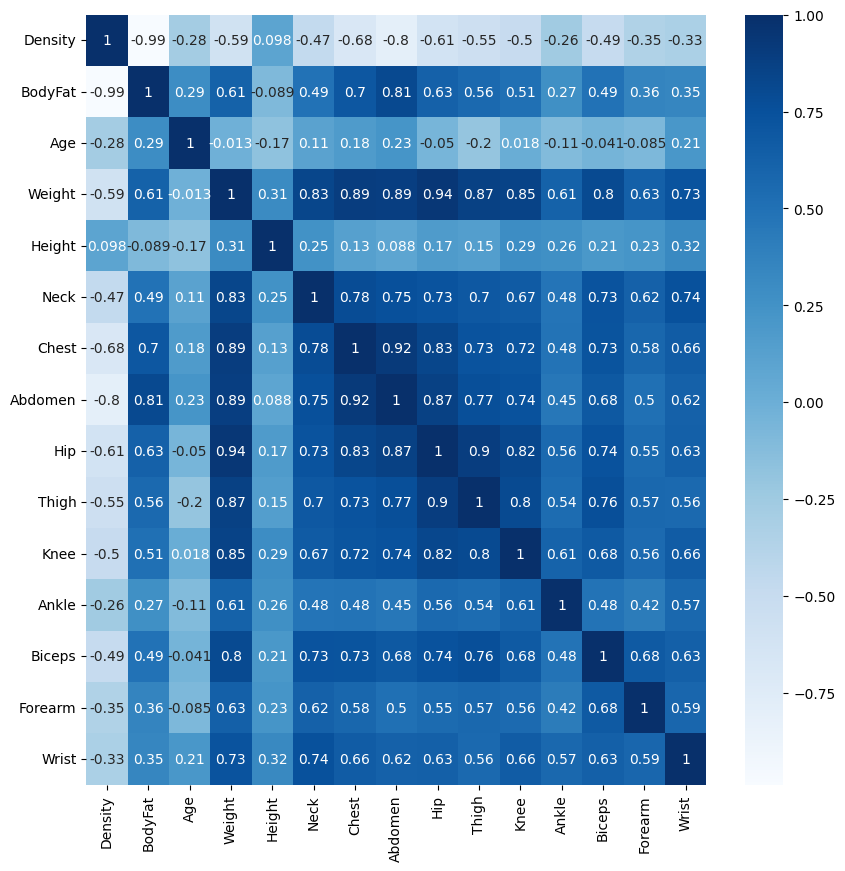

In [24]:
# matriz de correlación
corr = df_fat.corr()
# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='Blues')

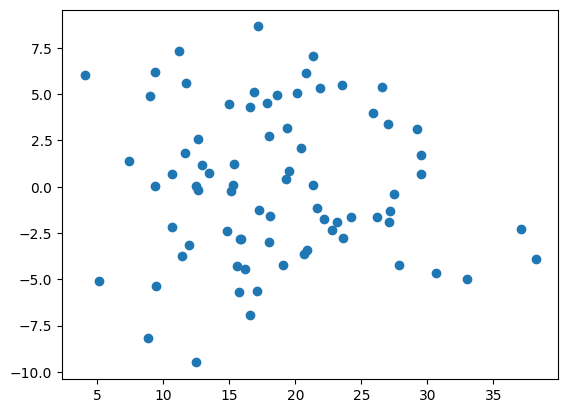

In [25]:
# Graficar residuos
residuos = y_test - y_pred_test
plt.scatter(y_pred_test, residuos)

In [26]:
X_stat = sm.add_constant(X_train)
model = sm.OLS(y_train, X_stat)
results = model.fit()
print('Sumario:  ',results.summary() )
print('Params:  ',results.params)

Sumario:                               OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     39.13
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           8.30e-42
Time:                        16:27:37   Log-Likelihood:                -507.31
No. Observations:                 176   AIC:                             1041.
Df Residuals:                     163   BIC:                             1082.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1423      0.344     55.6

In [27]:
ridgereg = Ridge(alpha=0.1)
ridgereg.fit(X_train, y_train)
y_pred_ridge = ridgereg.predict(X_test)


In [28]:
# Lista de alphas de 0.001 a 1000 en pasos de 0.001
alpha_list = np.linspace(0.001, 0.1, 1000)
ridge_cv = RidgeCV(alphas=alpha_list).fit(X_train, y_train)
print('Alpha:', ridge_cv.alpha_)
print('Score:', ridge_cv.score(X_test, y_test))
print('Coeficientes:', ridge_cv.coef_)

Alpha: 0.1
Score: 0.74265126418461
Coeficientes: [-2.52965763 -0.48119566 -1.04029702 -0.13469742 11.24811688 -2.26154372
  0.88758829 -0.05734449  0.08111997  0.66060538  0.8381625  -1.39941341]


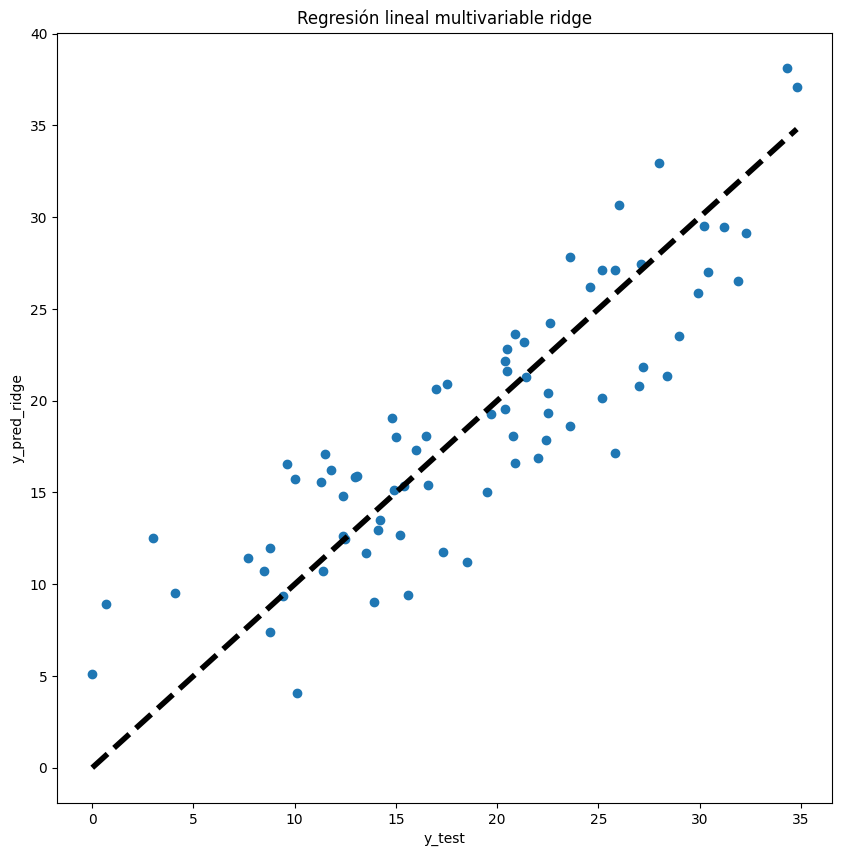

In [29]:
# Graficar regresión linal multivariable ridge
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('y_test')
plt.ylabel('y_pred_ridge')
plt.title('Regresión lineal multivariable ridge')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)


In [30]:

lassoreg = Lasso(alpha=0.1)
lassoreg.fit(X_train, y_train)
y_pred_lasso = lassoreg.predict(X_test)
   
alpha_list = np.linspace(0.001, 0.1, 1000)
lasso_cv = LassoCV(alphas=alpha_list).fit(X_train, y_train)
print('Alpha:', lasso_cv.alpha_)
print('Score:', lasso_cv.score(X_test, y_test))
print('Coeficientes:', lasso_cv.coef_)


Alpha: 0.016162162162162163
Score: 0.7441101632640186
Coeficientes: [-2.40859731e+00 -4.93605281e-01 -1.00230517e+00 -4.65385261e-03
  1.09851402e+01 -2.09875094e+00  7.36141225e-01 -0.00000000e+00
  2.72497374e-02  6.09456595e-01  7.97448424e-01 -1.39127558e+00]


In [31]:

elasticreg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticreg.fit(X_train, y_train)
alpha_list = np.linspace(0.0001, 0.1, 1000)

y_pred_elastic = elasticreg.predict(X_test)
elastic_cv = ElasticNetCV(alphas=alpha_list, l1_ratio=0.5).fit(X_train, y_train)
print('Alpha:', elastic_cv.alpha_)
print('L1 ratio:', elastic_cv.l1_ratio_)
print('Score:', elastic_cv.score(X_test, y_test))
print('Coeficientes:', elastic_cv.coef_)

Alpha: 0.0007000000000000001
L1 ratio: 0.5
Score: 0.7426198176023218
Coeficientes: [-2.53969972 -0.47929675 -1.03982662 -0.14118002 11.26518619 -2.26511705
  0.88841572 -0.05620924  0.08213867  0.6610185   0.83919307 -1.39966428]


In [32]:

n = 12
pd.DataFrame(
    {
        'variables': df_fat.columns[3:], 'VIF':[variance_inflation_factor(X, i) for i in range(n)]
    }
)

,variables,VIF
0,Weight,32.068597
1,Height,1.644955
2,Neck,4.288553
3,Chest,9.449550
4,Abdomen,9.377541
5,Hip,14.701777
6,Thigh,6.737076
7,Knee,4.321386
8,Ankle,1.887277
9,Biceps,3.600760


In [34]:
train_score_ls = Lasso.score(X_train, y_train)
test_score_ls = Lasso.score(X_test, y_test)
print('train_score_ls: ', train_score_ls, 'test_score_ls: ', test_score_ls)

train_score_rg = Ridge.score(X_train, y_train)
test_score_rg = Ridge.score(X_test, y_test)
print('train_score_rg: ', train_score_rg, 'test_score_rg: ', test_score_rg)


TypeError: RegressorMixin.score() missing 1 required positional argument: 'y'

In [35]:
alps = 10**np.linspace(-2, 2, 50)
alps

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

In [37]:
lambs = 10**np.linspace(-2, 0, 50)
lambs

array([0.01      , 0.01098541, 0.01206793, 0.01325711, 0.01456348,
       0.01599859, 0.01757511, 0.01930698, 0.02120951, 0.02329952,
       0.02559548, 0.02811769, 0.03088844, 0.03393222, 0.03727594,
       0.04094915, 0.04498433, 0.04941713, 0.05428675, 0.05963623,
       0.06551286, 0.07196857, 0.07906043, 0.08685114, 0.09540955,
       0.10481131, 0.11513954, 0.12648552, 0.13894955, 0.1526418 ,
       0.16768329, 0.184207  , 0.20235896, 0.22229965, 0.24420531,
       0.26826958, 0.29470517, 0.32374575, 0.35564803, 0.39069399,
       0.42919343, 0.47148664, 0.51794747, 0.5689866 , 0.62505519,
       0.68664885, 0.75431201, 0.82864277, 0.91029818, 1.        ])

In [38]:
lasso_cv = LassoCV(alphas=alps, random_state=0).fit(X_train, y_train)
print("lasso_coef: ", lasso_cv.coef_)

lasso_cv.score(X_test, y_test)
lasso_cv.score(X_train, y_train)

print('lasso_coef: ', lasso_cv.alpha_)

elastic_cv = ElasticNetCV(alphas=alps, l1_ratio=0.5, cv = 10).fit(X_train, y_train)
print("elastic_coef: ", elastic_cv.alpha_)

lasso_coef:  [-2.38675119 -0.49578537 -0.99908632 -0.         10.96190268 -2.08426799
  0.72172742 -0.          0.02226714  0.60469568  0.79395562 -1.3897772 ]
lasso_coef:  0.017575106248547922
elastic_coef:  0.01


In [39]:
elastic_cv = ElasticNetCV(alphas=alps, l1_ratio=lambs, cv = 10).fit(X_train, y_train)
print("elastic_coef: ", elastic_cv.alpha_, 'elastic alpha coef', elastic_cv.l1_ratio_)
elastic_cv.coef_

elastic_coef:  0.054286754393238594 elastic alpha coef 1.0


array([-1.84438974, -0.55905293, -0.87968413, -0.        , 10.47085133,
       -1.72296212,  0.31292134, -0.        , -0.        ,  0.48618533,
        0.71196168, -1.38766494])

In [40]:
ridge_cv = RidgeCV(alphas = alps).fit(X_train, y_train)
print('ridge_coef: ', ridge_cv.coef_)

print('score ridge x_train: ', ridge_cv.score(X_train, y_train))
print('score ridge x_test: ', ridge_cv.score(X_test, y_test))

ridge_coef:  [-2.5163257  -0.48351566 -1.03986106 -0.12471488 11.22376711 -2.25396852
  0.88314278 -0.05694491  0.07876626  0.65898482  0.83611185 -1.39900431]
score ridge x_train:  0.7423147589066682
score ridge x_test:  0.7427248016186728


In [41]:
print('score lasso x_test: ', lasso_cv.score(X_test, y_test))
print('score lasso x_train: ', lasso_cv.score(X_train, y_train))

print('coef lasso: ', lasso_cv.coef_)

score lasso x_test:  0.7441876619969381
score lasso x_train:  0.742011030672874
coef lasso:  [-2.38675119 -0.49578537 -0.99908632 -0.         10.96190268 -2.08426799
  0.72172742 -0.          0.02226714  0.60469568  0.79395562 -1.3897772 ]


In [42]:
x_stat = sm.add_constant(X_train)
model = sm.OLS(y_train, x_stat)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     39.13
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           8.30e-42
Time:                        16:31:47   Log-Likelihood:                -507.31
No. Observations:                 176   AIC:                             1041.
Df Residuals:                     163   BIC:                             1082.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1423      0.344     55.673      0.0

In [43]:
import sklearn
print(sklearn.__version__)

1.3.0


In [44]:
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)
y_pred_ransac = ransac.predict(X_test)
print('score ransac: ', ransac.score(X_test, y_test))


score ransac:  0.5779415415154209


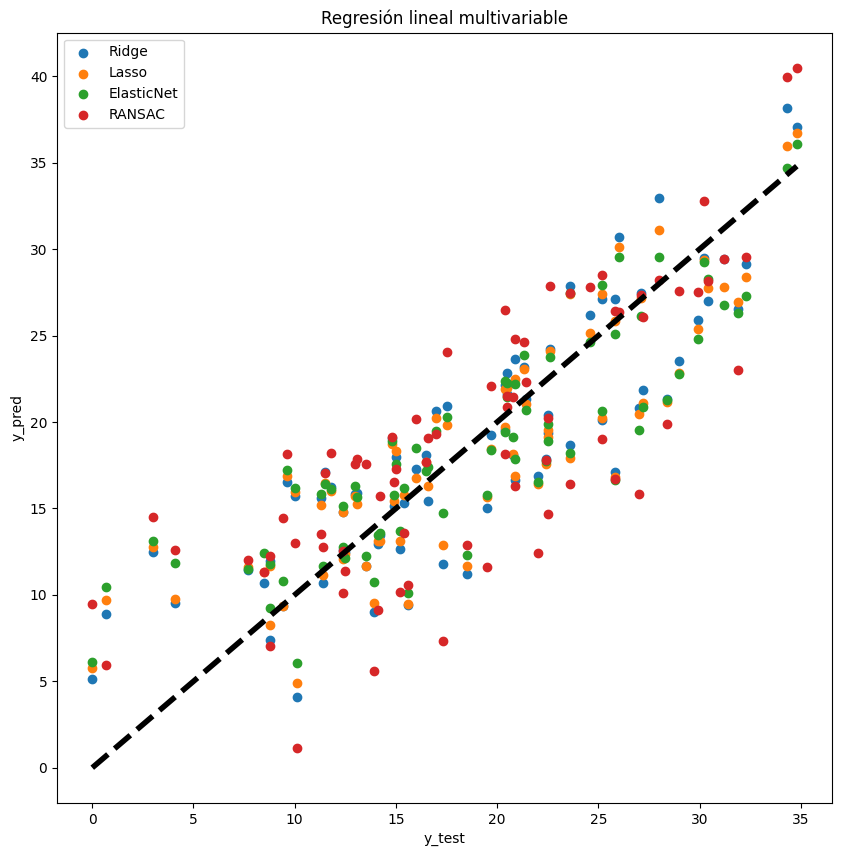

In [45]:
#Grafica como se ajustan los diferentes modelos
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred_ridge, label='Ridge')
plt.scatter(y_test, y_pred_lasso, label='Lasso')
plt.scatter(y_test, y_pred_elastic, label='ElasticNet')
plt.scatter(y_test, y_pred_ransac, label='RANSAC')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Regresión lineal multivariable')
plt.legend()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

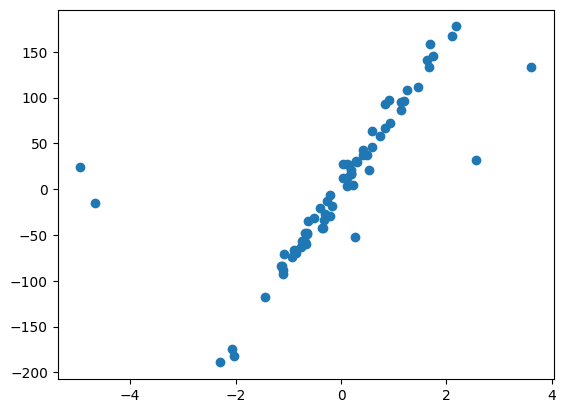

In [46]:
from sklearn.datasets import make_regression
def get_dataset():
    x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=1)
    for i in range(10):
        factor = np.random.randint(1, 6)
        if np.random.random() > 0.5:
            x[i] += factor * x.std()
        else:
            x[i] -= factor * x.std()
    return x,y
x,y = get_dataset()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

plt.scatter(x_train, y_train)
plt.show()

In [58]:
model_lr = LinearRegression()
results_lr = model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x)

model_h = HuberRegressor(epsilon=1.35)
results_h = model_h.fit(x_train,y_train)
y_pred_h = model_h.predict(x)

model_ran = RANSACRegressor()
results_ran = model_ran.fit(x_train, y_train)
y_pred_ran = model_ran.predict(x)

model_t = TheilSenRegressor()
result_t = model_t.fit(x_train, y_train)
y_pred_t = model_t.predict(x)


model_l = LassoCV(alphas = alps)
result_l = model_l.fit(x_train, y_train)
y_pred_l = model_l.predict(x)

model_els = ElasticNet().fit(x_train, y_train)
y_pred_els = model_els.predict(x)

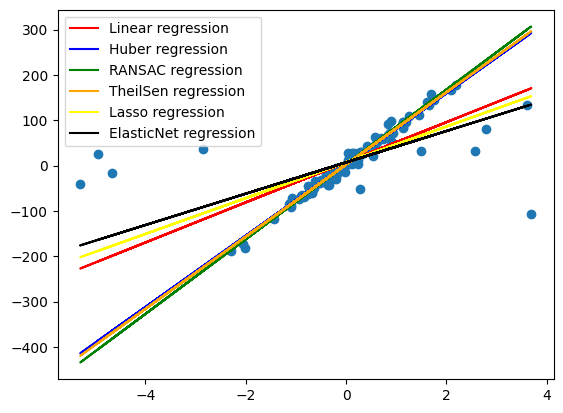

In [59]:
plt.figure()
plt.scatter(x, y)
plt.plot(x, y_pred_lr, color = 'red', label = 'Linear regression')
plt.plot(x, y_pred_h, color = 'blue', label = 'Huber regression')
plt.plot(x, y_pred_ran, color = 'green', label = 'RANSAC regression')
plt.plot(x, y_pred_t, color = 'orange', label = 'TheilSen regression')
plt.plot(x, y_pred_l, color = 'yellow', label = 'Lasso regression')
plt.plot(x, y_pred_els, color = 'black', label = 'ElasticNet regression')
plt.legend()

In [56]:
print("lasso_coef: ", model_l.coef_)
print('lasso_alpha: ', model_l.alpha_)

lasso_coef:  [39.52034812]
lasso_alpha:  8.68511373751352


(563, 563, 3)
248


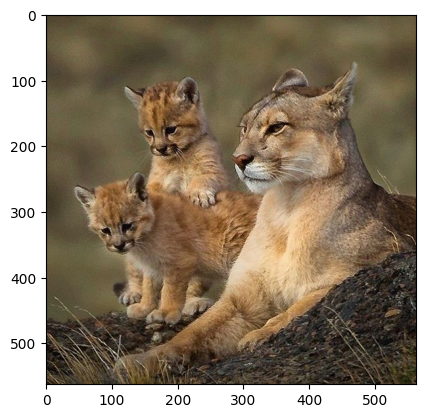

In [5]:
image_raw = imread('puma_2.jpg')
print(np.shape(image_raw))
print(image_raw[:,:,2].max())
plt.imshow(image_raw)

(563, 563)
1.0


Text(0.5, 1.0, '563 PCs')

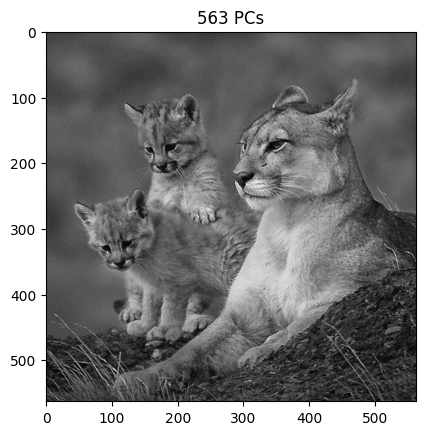

In [12]:
#image_sum = image_raw[:,:,0] + image_raw[:,:,1] + image_raw[:,:,2]
#plt.imshow(image_sum)
image_sum = image_raw.sum(axis=2)
print(np.shape(image_sum))

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure()
plt.imshow(image_bw, cmap=plt.cm.gray)
plt.title(f"{image_sum.shape[0]} PCs")

In [18]:
pca = PCA()
pca.fit(image_bw)

PCA()

In [23]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
print(var_cumu)

[0.38573907 0.4769518  0.54677614 0.58970639 0.62626776 0.65453399
 0.67448306 0.69160681 0.70798901 0.72384371 0.73682628 0.7482848
 0.75718109 0.76543825 0.77310659 0.77987463 0.78556853 0.79112894
 0.7962995  0.80133274 0.80624941 0.81068889 0.81484764 0.81896468
 0.82288473 0.82666189 0.83026397 0.83372304 0.83713182 0.84032196
 0.84336131 0.84637561 0.8493083  0.85211084 0.85487877 0.85759869
 0.86023912 0.86281923 0.86537508 0.86778087 0.87018393 0.87249378
 0.87476429 0.87699641 0.87916558 0.88125421 0.88329286 0.885301
 0.88726262 0.88915235 0.89103032 0.89283307 0.89457454 0.89628807
 0.89798138 0.89966755 0.90128455 0.9028783  0.90444117 0.90598284
 0.90751196 0.90898471 0.9104273  0.91185136 0.91322306 0.91456479
 0.91588597 0.91718836 0.91847376 0.9197325  0.92096066 0.92217405
 0.92337134 0.92453969 0.9256803  0.9268151  0.92790463 0.92899324
 0.93004285 0.93108734 0.93211269 0.93312179 0.93411143 0.93508072
 0.93603534 0.93697778 0.93789576 0.93880659 0.93969708 0.9405737

In [30]:
por1 = 0.95
k = np.argmax(var_cumu > por1)
print("PCs explican el 95% de la varianza: ", k)


PCs explican el 95% de la varianza:  101


In [37]:
por1 = 0.95
k = np.argmax(var_cumu > por1)
print(k)

101


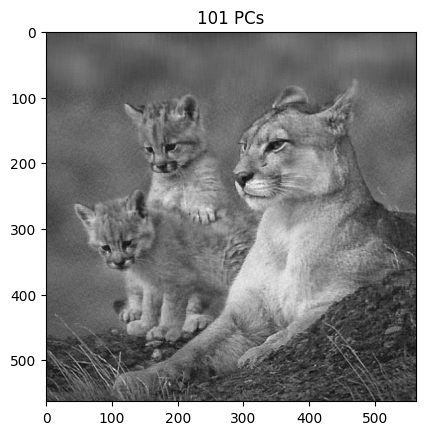

In [35]:
ipca = PCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

plt.figure
plt.imshow(image_recon, cmap=plt.cm.gray)
plt.title(f"{k} PCs")
plt.show()

In [38]:
por2 = 0.90
k2 = np.argmax(var_cumu > por2)
print(k2)

56


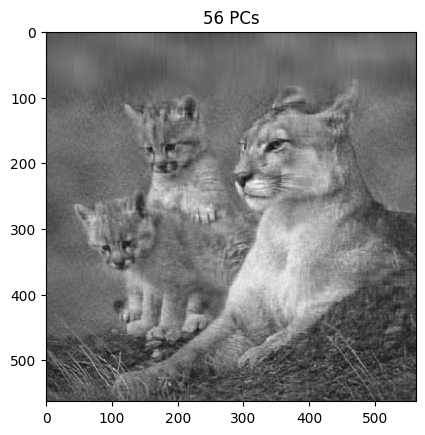

In [39]:
ipca2 = PCA(n_components=k2)
image_recon2 = ipca2.inverse_transform(ipca2.fit_transform(image_bw))

plt.figure()
plt.imshow(image_recon2, cmap=plt.cm.gray)
plt.title(f"{k2} PCs")
plt.show()

In [43]:
df = pd.read_csv("meatspec.csv")
df = df.drop(columns = df.columns[0])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [45]:
y = df.fat
x = df.drop(["fat"], axis = 1).astype("float64")

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.shape(x_train)

(150, 100)

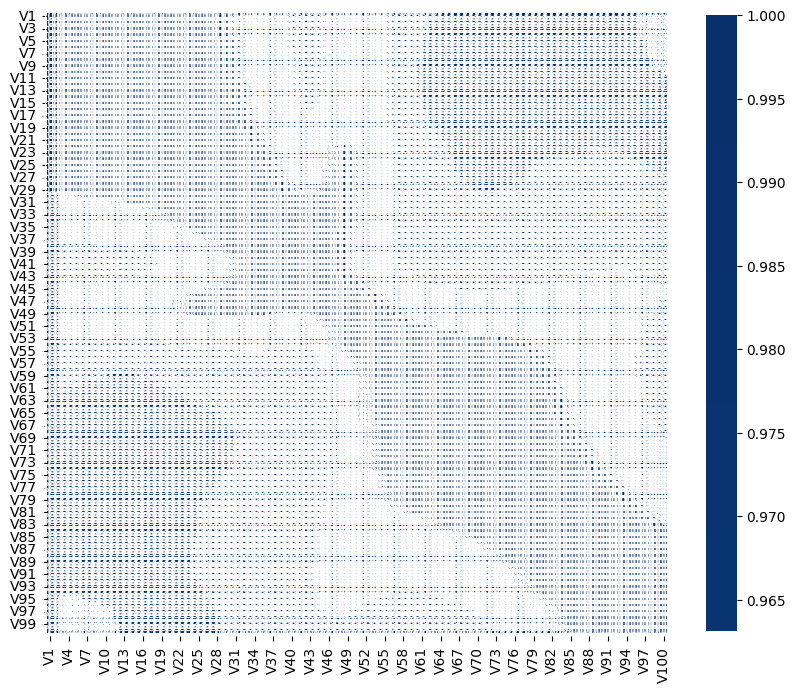

In [52]:
data_cor = x.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(data_cor, vmax = 1, cbar_kws = {"shrink": 0.8}, square =True, annot = True,
fmt = ".2f", center = 0, cmap = "Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [60]:
#Aplicar una regresion lineal
model_lr = LinearRegression()
results_lr = model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
train_score_lr = model_lr.score(x_train, y_train)
test_score_lr = model_lr.score(x_test, y_test)
print('score lr: ', model_lr.score(x_test, y_test))
print("train_score_lr: ", train_score_lr, "test_score_lr: ", test_score_lr)

score lr:  0.9066888183595484
train_score_lr:  0.99696190868819 test_score_lr:  0.9066888183595484


In [62]:
x_stat = sm.add_constant(x_train)
model = sm.OLS(y_train, x_stat)
results = model.fit()
print("results.summary", results.summary())
print("\nresults.params", results.params)

results.summary                             OLS Regression Results                            
Dep. Variable:                    fat   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     160.8
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           3.73e-43
Time:                        15:09:41   Log-Likelihood:                -161.12
No. Observations:                 150   AIC:                             524.2
Df Residuals:                      49   BIC:                             828.3
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4933      2.832    

In [67]:
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=x_train, y = y_train)
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [69]:
train_score = pipe_modelado.score(x_train, y_train)
test_score = pipe_modelado.score(x_test, y_test)
print("train_score: ", train_score, "\ntest_score: ", test_score)


train_score:  0.9969619086881822 
test_score:  0.9066888183597135


In [86]:
lista_de_100 = list(range(1,101))
param_grid = {"pca__n_components": lista_de_100}
grid = GridSearchCV(
    estimator = pipe_modelado,
    param_grid = param_grid,
    scoring = "r2",
    n_jobs = multiprocessing.cpu_count(),
    cv = KFold(n_splits = 10),
    refit = True,
    verbose = 0,
    return_train_score = True
)

grid.fit(x_train, y_train)

results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.021243,0.003230,0.005786,0.003828,1,{'pca__n_components': 1},0.073171,0.161698,0.487124,-0.204003,...,0.206355,0.282446,0.266383,0.238765,0.245114,0.259850,0.239509,0.226335,0.245971,0.020066
1,0.024282,0.006733,0.009484,0.005525,2,{'pca__n_components': 2},0.323777,0.346503,0.512938,-0.153954,...,0.254331,0.330091,0.317971,0.285220,0.293154,0.297473,0.295477,0.283423,0.292615,0.019640
2,0.034172,0.013291,0.010204,0.011702,3,{'pca__n_components': 3},0.658140,0.062459,0.829134,0.469525,...,0.690301,0.699007,0.659152,0.680035,0.639764,0.699894,0.695290,0.687135,0.687631,0.025271
3,0.029711,0.010488,0.010214,0.006973,4,{'pca__n_components': 4},0.879635,0.692480,0.912197,0.868587,...,0.881730,0.887080,0.882588,0.881387,0.885582,0.887454,0.885880,0.890435,0.886834,0.005026
4,0.034740,0.009969,0.007990,0.003949,5,{'pca__n_components': 5},0.893170,0.914076,0.939222,0.950704,...,0.944246,0.943034,0.939116,0.941141,0.956253,0.939667,0.943093,0.939149,0.943348,0.004757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.024292,0.003362,0.009276,0.002157,96,{'pca__n_components': 96},0.963821,0.943495,-0.751684,0.869675,...,0.997911,0.997779,0.998268,0.997873,0.997648,0.997791,0.997806,0.996913,0.997663,0.000364
96,0.028702,0.007425,0.008217,0.003063,97,{'pca__n_components': 97},0.959503,0.943696,-0.624478,0.867582,...,0.997978,0.997779,0.998271,0.997877,0.997699,0.997811,0.997831,0.996976,0.997689,0.000356
97,0.030861,0.005546,0.006840,0.002963,98,{'pca__n_components': 98},0.962877,0.942169,-0.644765,0.819035,...,0.997979,0.997796,0.998333,0.998030,0.997717,0.997841,0.997843,0.997017,0.997730,0.000362
98,0.029287,0.007322,0.006186,0.003992,99,{'pca__n_components': 99},0.962831,0.933688,-0.540505,0.825397,...,0.998005,0.997817,0.998383,0.998033,0.997717,0.997842,0.997871,0.997083,0.997754,0.000357


In [80]:
#Guarda las variables de la media y la desviacion estandar de train y test en un nuevo dataframe
results.filter(regex = '(param|mean_t|std_t)').drop(columns = 'params') \
.sort_values('mean_test_score', ascending = False).head(10)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
28,29,0.968924,0.013221,0.985841,0.000735
29,30,0.967936,0.015313,0.986083,0.000857
27,28,0.966996,0.014146,0.985711,0.000720
30,31,0.966882,0.017861,0.986514,0.000848
26,27,0.966736,0.013899,0.985548,0.000686
31,32,0.966254,0.021460,0.986835,0.000871
32,33,0.963487,0.026704,0.987480,0.000815
23,24,0.961703,0.025217,0.984418,0.000710
24,25,0.961452,0.026361,0.984787,0.000713
20,21,0.961018,0.029403,0.981238,0.001957


Text(0, 0.5, 'score')

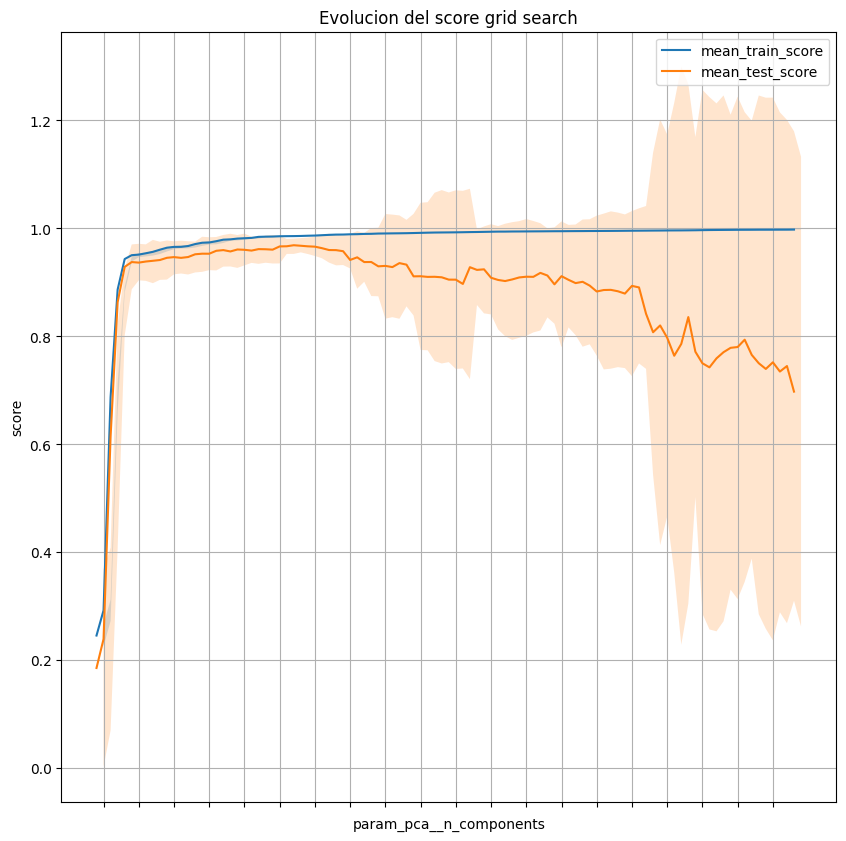

In [87]:
fig,ax = plt.subplots(figsize = (10,10))
results.plot('param_pca__n_components', 'mean_train_score', ax = ax)
results.plot('param_pca__n_components', 'mean_test_score', ax = ax)

ax.fill_between(results.param_pca__n_components.astype(float),
                results["mean_train_score"] + results["std_train_score"],
                results["mean_train_score"] - results["std_train_score"], alpha = 0.2)

ax.fill_between(results.param_pca__n_components.astype(float),
                results["mean_test_score"] + results["std_test_score"],
                results["mean_test_score"] - results["std_test_score"], alpha = 0.2)

ax.grid()
plt.xticks(range(1,100,5))
ax.legend()
ax.set_title("Evolucion del score grid search")
ax.set_ylabel("score")

In [95]:
print("Mejores hiperparametros encontrados (cv): ", grid.best_params_, ": ", grid.best_score_, grid.scoring)

Mejores hiperparametros encontrados (cv):  {'pca__n_components': 29} :  0.968923569123557 r2


In [98]:

pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components = 6), LinearRegression())
pipe_modelado.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6)),
                ('linearregression', LinearRegression())])

In [100]:
train_score = pipe_modelado.score(x_train, y_train)
test_score = pipe_modelado.score(x_test, y_test)
print("train_score: ", train_score, "\ntest_score: ", test_score)

train_score:  0.9498470542214402 
test_score:  0.9312320191861226


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Leer los datos
df = pd.read_csv("winequality-red.csv", sep=";")

# Separar variables dependientes e independientes
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
y = df['quality']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

# Imprimir un informe de clasificación
print('Informe de clasificación:\n', classification_report(y_test, y_pred))


Precisión: 0.5458333333333333
Informe de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.60      0.72      0.65       195
           6       0.50      0.60      0.55       200
           7       0.25      0.02      0.03        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.22      0.22      0.21       480
weighted avg       0.48      0.55      0.50       480



c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:134